Context: To develop a classification algorithm by applying cross-validation using KNN, Decision tree and Random forest which predicts the breast cancer diagnostics. The dataset contains ID, cancer diagnosis and 30 numerical laboratory measurements. 

the main goal is to develop a model which predicts whether the result is Malignant(M) or Benign(B) by using the mean, standard error and worst(mean of the three largest values) of the readings from patients.


Source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


In [1]:
import sweetviz as sv
import seaborn as sns
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
cancer_df = pd.read_csv(r'D:\Durham_AI - Downloads\AI Algorithms\breastCancer-dataset.csv')

In [3]:
display(cancer_df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [4]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


## Exploratory Data Analysis

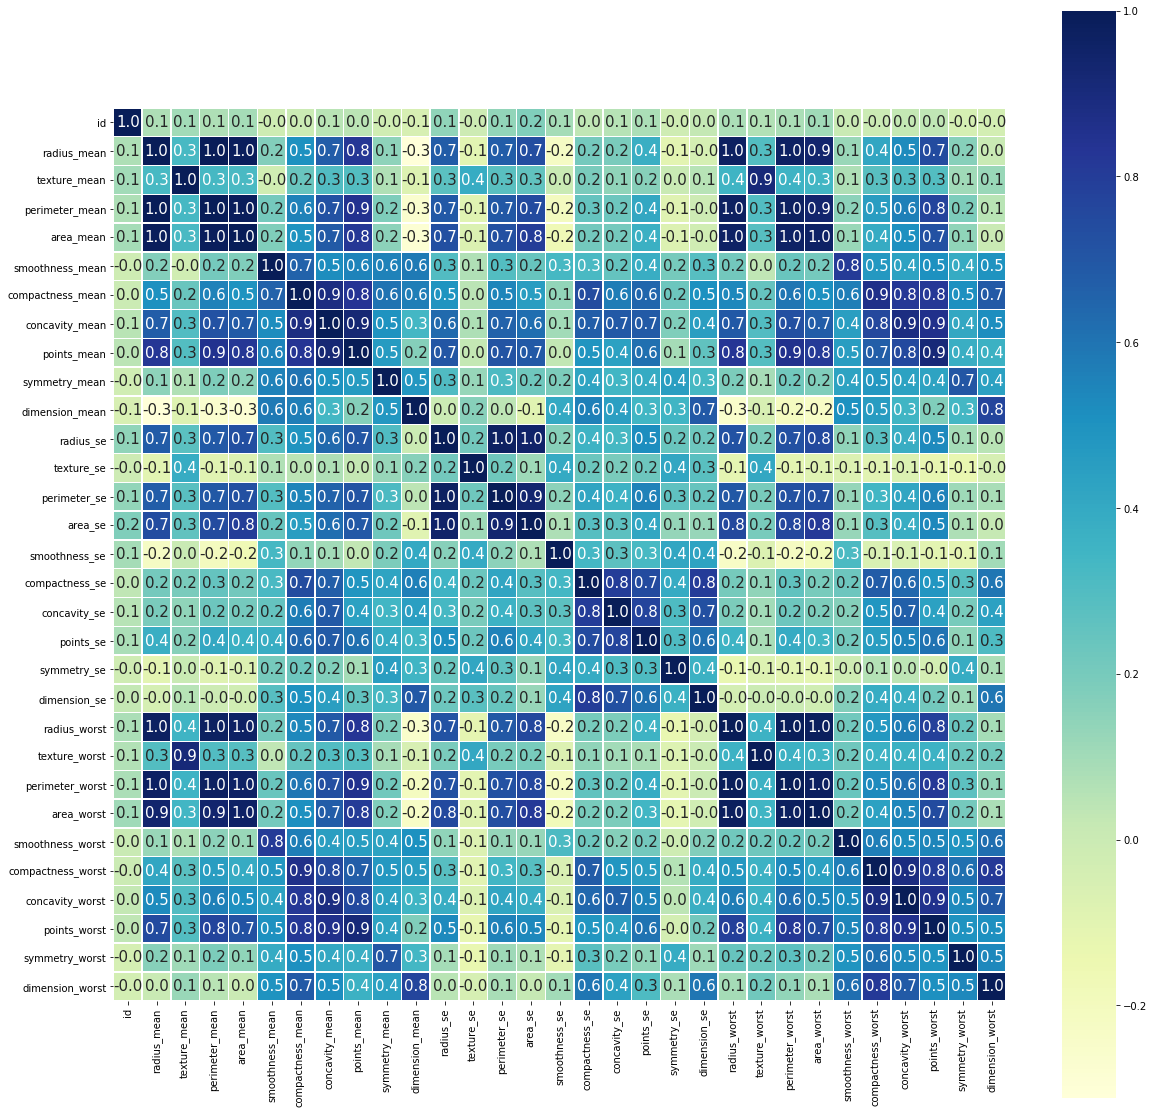

In [5]:
#checking for correlation between variables
corr_matrix=cancer_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cbar=True, square= True,linewidths=.5, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu')
plt.show()

Observations made from the above heatmap is that the mean, se, worst of radius,perimeter, area are highly correlated to each other. 

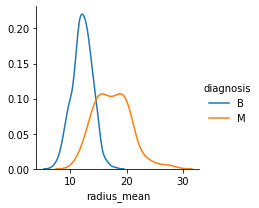

In [6]:
sns.FacetGrid(cancer_df, hue="diagnosis").map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

The above plot says that more the radius_mean, more the chances of patient being Malignant.

In [7]:
cancer_df.drop_duplicates()
cancer_df.shape #checking shape after dropping duplicates

(569, 32)

Shape of the dataframe remains same even after dropping duplicates, that means the set does not contain any duplicate values.

In [8]:
cancer_df=cancer_df.drop(columns = 'id') #dropping id column as we cannot do anything with it

In [9]:
cancer_df.isnull().sum() #checking for missing values

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

As per above outputs,'no missing values' and result being 'true' when checked for zero values are contradictory here. That means, the machine is considering '0' as a numerical value and is not displaying as missing row.

In [10]:
cancer_df['concavity_mean'].isin([0]).any().any() #checking random column for 'zero values'

True

In [11]:
cancer_df[['concavity_mean','points_mean','concavity_se','points_se','concavity_worst','points_worst']] = cancer_df[['concavity_mean','points_mean','concavity_se','points_se','concavity_worst','points_worst']].replace(0, np.NaN)

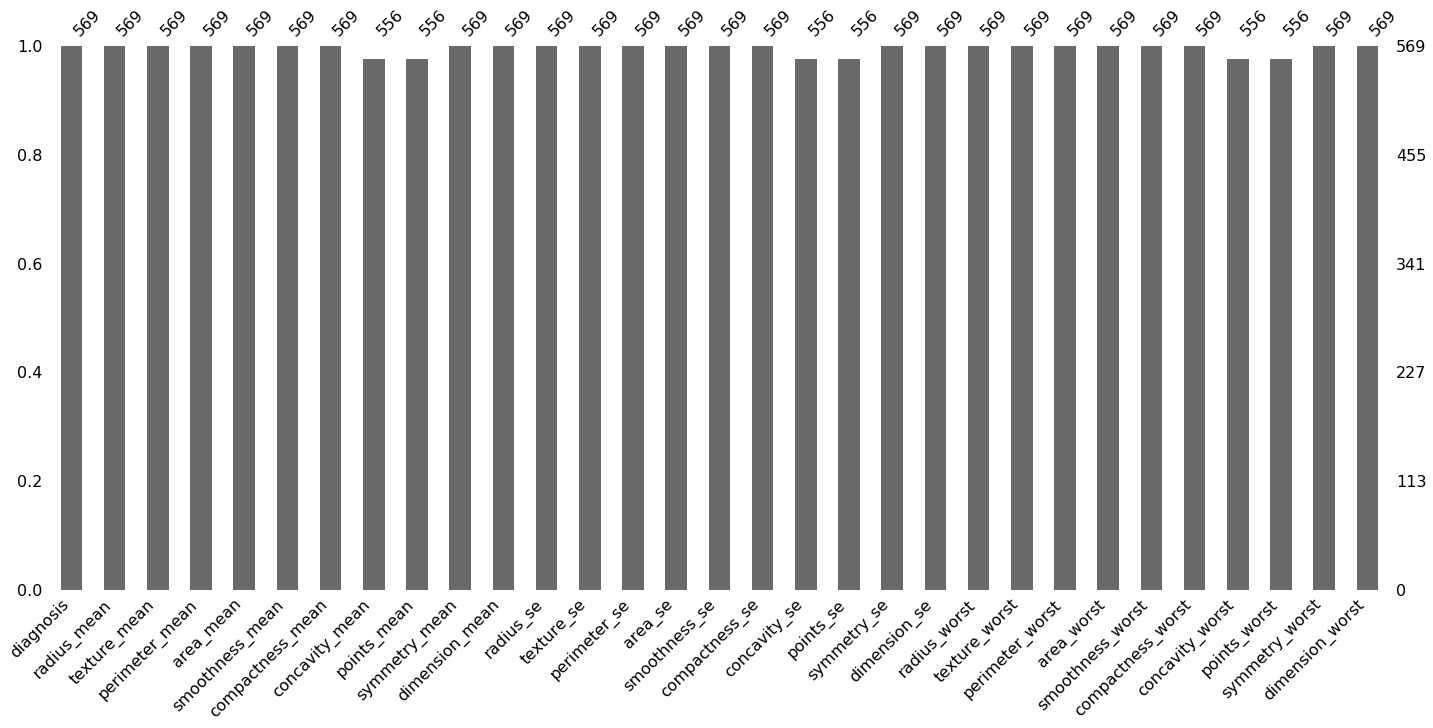

In [12]:
import missingno as msno
msno.bar(cancer_df);

In [13]:
cancer_df.isnull().sum()

diagnosis             0
radius_mean           0
texture_mean          0
perimeter_mean        0
area_mean             0
smoothness_mean       0
compactness_mean      0
concavity_mean       13
points_mean          13
symmetry_mean         0
dimension_mean        0
radius_se             0
texture_se            0
perimeter_se          0
area_se               0
smoothness_se         0
compactness_se        0
concavity_se         13
points_se            13
symmetry_se           0
dimension_se          0
radius_worst          0
texture_worst         0
perimeter_worst       0
area_worst            0
smoothness_worst      0
compactness_worst     0
concavity_worst      13
points_worst         13
symmetry_worst        0
dimension_worst       0
dtype: int64

The 13 rows that I see in the above output are the rows and columns with values equal to zero. Previously, when I got a report saying 'no missing values', it considered 'zeros' as a numerical value. Now that I filtered out the columns, I could see 13 rows contaning zero which is not possible in this example. While other variables have a value(more than zero) on the same row as concavity-mean,se,worst and points-mean,se,worst, them being equal to zero does not make any sense. 

Since the number of rows with zero value are less (which is 13), we would be dropping those rows from our dataframe.  

In [14]:
#dropping rows having zero 
cancer_df=cancer_df[cancer_df!=0].dropna()
cancer_df.shape
display(cancer_df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [15]:
cancer_report = sv.analyze(cancer_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:15  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [16]:
cancer_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


Plot to check the count of target variable

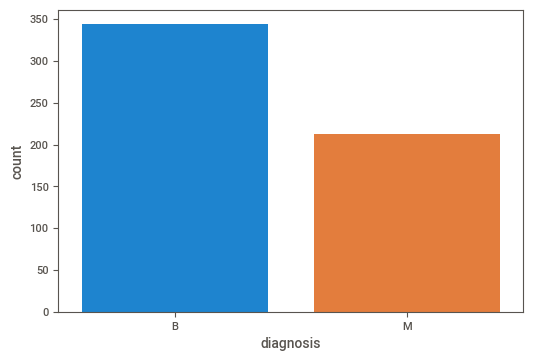

In [17]:
sns.countplot(x='diagnosis',data=cancer_df)

After observing the above countplot, could see around 352 Benign and around 207 Malignant which brings the total to 556.

In [18]:
# % distribution of values diagnosis
(cancer_df["diagnosis"].value_counts()*100)/len(cancer_df)

B    61.870504
M    38.129496
Name: diagnosis, dtype: float64

## Outliers

Checking for outliers using IQR rule considering 'points_mean' column as it has high correlation with target variable.

In [19]:
# Considering one of the features 'points_mean' as it is highly corelated to diagnosis and finding outliers
Q1 = cancer_df["points_mean"].quantile(0.25)
Q3 = cancer_df["points_mean"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [20]:
print("lower", lower)

lower -0.06002625


In [21]:
print("upper", upper)

upper 0.15576374999999998


In [22]:
cancer_df[(cancer_df["points_mean"] > upper)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
47,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
54,M,23.29,26.67,158.9,1685.0,0.1141,0.2084,0.3523,0.1620,0.2200,...,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
58,M,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,0.2655,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
99,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
165,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
275,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
460,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
487,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
544,M,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,0.2906,...,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
555,M,21.61,22.28,144.4,1407.0,0.1167,0.2087,0.2810,0.1562,0.2162,...,26.23,28.74,172.0,2081.0,0.1502,0.5717,0.7053,0.2422,0.3828,0.10070


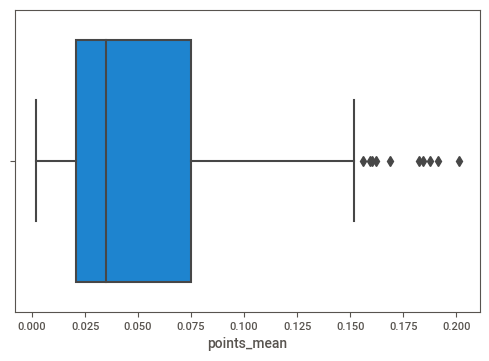

In [23]:
#in support of my calculation above made, trying to plot a boxplot to check for outliers
sns.boxplot(x=cancer_df["points_mean"])

As we could see, we have around 10 outlier points. Hence, I prefer not to do anything with it.

I thought of not going with feature engineering because the model is already giving a good result and also, I have mean, standard error and worst but not original measurements.

## Feature standardization

Feature scaling is important to measure the distance between the values. Afterall, KNN is all about the distance between data points. So I am normalizing all the values to its standard form.

In [24]:
#splitting up data to X and y sets 
X = cancer_df.drop('diagnosis',axis=1)
y = cancer_df['diagnosis'].map({'M':1, 'B':0})
cols = X.columns
index = X.index

In [25]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [27]:
cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean', 'points_mean',
       'symmetry_mean', 'dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'points_se', 'symmetry_se', 'dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [28]:
index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            559, 560, 561, 562, 563, 564, 565, 566, 567, 568],
           dtype='int64', length=556)

Out of three different scaling methods such as Min-Max, Standard and Robust, I am using the last one.

In [29]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [30]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.265187,-1.163293,-0.280224,-0.252633,0.361089,-0.395046,-0.246784,0.040039,0.491876,-0.233512,...,-0.256133,-1.169001,-0.269069,-0.251068,0.238422,-0.474728,-0.405446,-0.079949,0.003679,-0.611448
1,-0.667056,0.017094,-0.605679,-0.570483,0.045103,0.306442,-0.010203,-0.156078,0.382570,0.403446,...,-0.525572,-0.298659,-0.475079,-0.463438,-0.351630,0.181174,-0.150530,-0.230301,0.169978,-0.207937
2,-0.564252,-0.364372,-0.549906,-0.498110,0.622631,-0.266437,-0.339544,-0.186107,-0.231905,0.224005,...,-0.437422,0.118629,-0.435963,-0.383820,0.183533,-0.361297,-0.471634,-0.281103,0.255335,-0.062554
3,-0.508178,-0.983356,-0.479170,-0.466784,1.087003,0.289253,-0.182907,0.243199,-0.063516,-0.094474,...,-0.518919,-1.153502,-0.516565,-0.447719,0.176672,-0.182749,-0.547315,-0.160000,-1.063282,-0.605019
4,0.405374,-1.015744,0.359123,0.416284,-0.875634,-0.402391,-0.305338,-0.153297,-0.211226,-0.721925,...,0.192931,-1.158271,0.146506,0.210234,-0.650086,-0.227386,-0.360061,-0.204439,-0.496689,-0.613920


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

Now that the X and y datasets are ready, I am proceeding with modeling.

## Modeling

Splitting data into train and test subsets

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
X = cancer_df.drop('diagnosis',axis=1)
y = cancer_df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## K - Nearest Neighboring 

In [34]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,y_train)
y_predicted_knn = KNN.predict(X_test) 

In [35]:
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_predicted_knn))

Accuracy KNN: 0.9461077844311377


## Cross Validation 

Splitting training dataset into sub-groups which is also called as k-folds and validating them would give a better accuracy. That is what we are going to implement now.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [37]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('RF',  RandomForestClassifier(n_estimators=100)))

In [38]:
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, y, stratify = cancer_df.diagnosis, random_state=0)

In [39]:
names = []
scores = []

for name, model in models:
    model.fit(X_train_cross, y_train_cross)
    y_pred_cross = model.predict(X_test_cross)
    scores.append(accuracy_score(y_test_cross, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.906475
1   DT  0.899281
2   RF  0.949640


#### Hyperparameter tuning:

K-fold, where given data is split into a k number of sections or folds. 

The ideal split usually be between 5 and 10. We worked with 5. 

In the first iteration, the first fold is used to test the model and the rest are used to train the model.

In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. 

This process is repeated until each fold of the 5 folds have been used as the training set.


In [40]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

C:\Users\home\anaconda3\ANACONDA3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


  Name     Score
0  KNN  0.931786
1   DT  0.928084
2   RF  0.958701


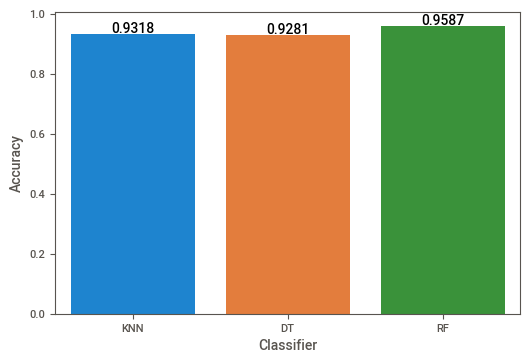

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

The model is neither overfitting nor underfitting. Since KNN and DT yielded moderate accuracies, I'd say Random forest is our champion!

